# Calculate episodes duration distribution

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
import pandas as pd

from backend.podcasts.you_are_not_so_smart.you_are_not_so_smart_source import \
    get_episodes as you_are_not_so_smart_get_episodes
from backend.podcasts.practicalai.practicalai_source import get_episodes as practicalai_get_episodes
from backend.podcasts.changelog.changelog_source import get_episodes as changelog_get_episodes
from backend.podcasts.mongodb.mongodb_source import get_episodes as mongodb_get_episodes
from backend.podcasts.recommender_systems_experts.recommender_systems_experts_source import \
    get_episodes as recommender_systems_experts_get_episodes
from backend.podcasts.software_engineering.software_engineering_source import \
    get_episodes as software_engineering_get_episodes

       duration_in_min
count      1942.000000
mean         55.236689
std          21.269817
min           1.133333
25%          42.929167
50%          55.625000
75%          68.329167
max         171.316667


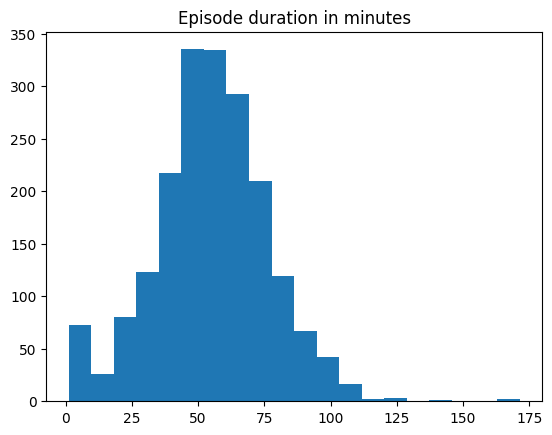

In [46]:
def extract_durations(episodes):
    return list(map(lambda episode: episode['duration_in_sec'] / 60, episodes))


duration_pd = pd.DataFrame({
    'duration_in_min': [
        *extract_durations(you_are_not_so_smart_get_episodes()),
        *extract_durations(practicalai_get_episodes()),
        *extract_durations(changelog_get_episodes()),
        *extract_durations(mongodb_get_episodes()),
        *extract_durations(recommender_systems_experts_get_episodes()),
        *extract_durations(software_engineering_get_episodes()),
    ]
})

plt.title("Episode duration in minutes")
plt.hist(duration_pd, bins=20)

print(duration_pd.describe())